In [1]:
import sys
sys.path.append(r'C:\Users\rezio\OneDrive\Documentos\.git codes\parepy')

Sample sizes considered at each step: [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000]
Estimated probability of failure (mean): [np.float64(0.242), np.float64(0.247), np.float64(0.247), np.float64(0.24725), np.float64(0.2472), np.float64(0.24633333333333332), np.float64(0.24757142857142858), np.float64(0.2485), np.float64(0.24933333333333332), np.float64(0.2495), np.float64(0.24836363636363637), np.float64(0.2475), np.float64(0.24769230769230768), np.float64(0.24671428571428572), np.float64(0.24713333333333334), np.float64(0.2471875), np.float64(0.24670588235294116), np.float64(0.24688888888888888), np.float64(0.24705263157894736), np.float64(0.24675), np.float64(0.2464761904761905), np.float64(0.2

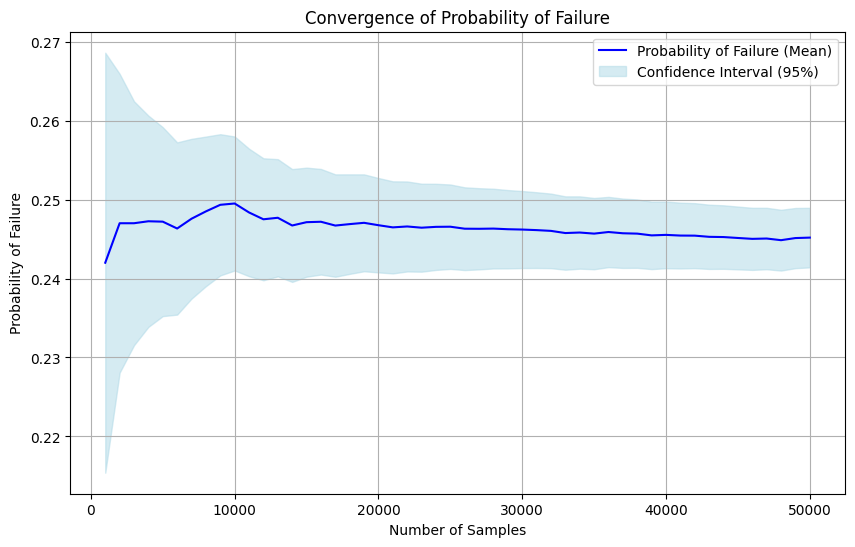

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from parepy_toolbox import sampling_algorithm_structural_analysis, common_library

def obj(x):
    return [12.5 * x[0]**3 - x[1]]

d = {'type': 'normal', 'parameters': {'mean': 1., 'std': 0.1}}
l = {'type': 'normal', 'parameters': {'mean': 10., 'std': 1.}}
var = [d, l]

df, pf, beta = sampling_algorithm_structural_analysis(obj, var, method='lhs', n_samples=50000, number_of_limit_functions=1, parallel=False, verbose=False)
div, pf_mean, ci_lower, ci_upper, pf_var = common_library.convergence_probability_failure(df, 'I_0')

print("Sample sizes considered at each step:", div)
print("Estimated probability of failure (mean):", pf_mean)
print("Lower confidence interval values:", ci_lower)
print("Upper confidence interval values:", ci_upper)
print("Variance values:", pf_var)

plt.figure(figsize=(10, 6))
plt.plot(div, pf_mean, label='Probability of Failure (Mean)', color='blue')
plt.fill_between(div, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='Confidence Interval (95%)')
plt.xlabel('Number of Samples')
plt.ylabel('Probability of Failure')
plt.title('Convergence of Probability of Failure')
plt.legend()
plt.grid(True)
plt.savefig('convergence_probability_failure.png')
plt.show()